In [3]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # add parent folder to path

import pandas as pd
from src.reconciliation import reconcile_invoices
import matplotlib.pyplot as plt

In [4]:
invoices = pd.read_csv("../data/invoices_sample.csv")
rates = pd.read_csv("../data/rates_sample.csv")

print("Invoices shape:", invoices.shape)
invoices.head()

Invoices shape: (3, 9)


,invoice_id,load_id,origin,destination,miles_billed,rate_billed_per_mile,fuel_surcharge_pct,accessorial_desc,accessorial_amount
0,INV-1001,LD-7781,"Buffalo, NY","Columbus, OH",312,2.15,34.0,Lift Gate Service,95.0
1,INV-1002,LD-7782,"Buffalo, NY","Columbus, OH",312,2.15,37.0,Liftgate svc,125.0
2,INV-1003,LD-7783,"Toledo, OH","Detroit, MI",62,3.05,29.0,Hazmat Handling,80.0


In [5]:
results, summary = reconcile_invoices(invoices, rates)
display(results)
print("\nSummary:", summary)

,invoice_id,load_id,origin,destination,rate_diff_pct,fuel_diff_pct_points,accessorial_similarity,flags,confidence_score,recoverable_amount_est
0,INV-1001,LD-7781,"Buffalo, NY","Columbus, OH",2.38,-1.0,1.000,RATE_OVER_CONTRACT,1.000,15.6
1,INV-1002,LD-7782,"Buffalo, NY","Columbus, OH",2.38,2.0,0.828,RATE_OVER_CONTRACT;FUEL_SURCHARGE_OVER_CONTRAC...,0.914,53.7
2,INV-1003,LD-7783,"Toledo, OH","Detroit, MI",0.00,-1.0,1.000,OK,1.000,0.0



Summary: {'total_invoices': 3, 'pct_flagged': np.float64(66.67), 'total_recoverable_usd': np.float64(69.3)}


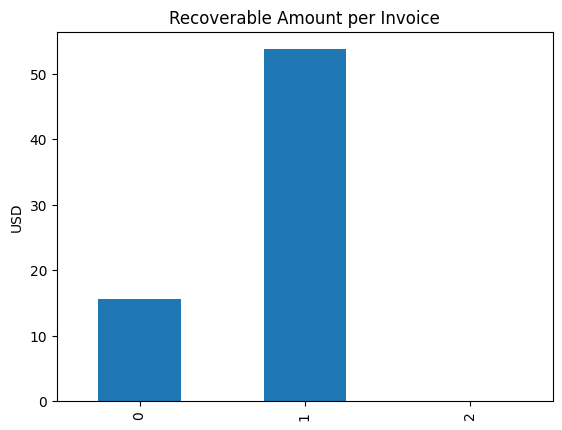

In [6]:
results['recoverable_amount_est'].plot(
    kind='bar',
    title='Recoverable Amount per Invoice',
    ylabel='USD'
)
plt.show()

,metric,value
0,Total invoice lines reviewed,3
1,% of invoices flagged for exception,66.67%
2,Estimated recoverable $,$69.3


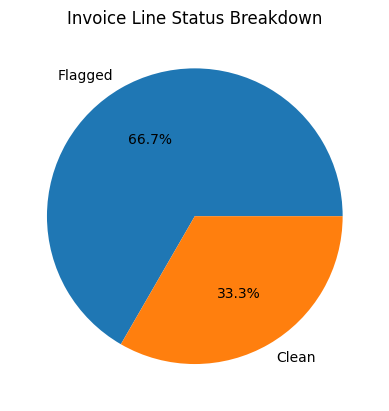

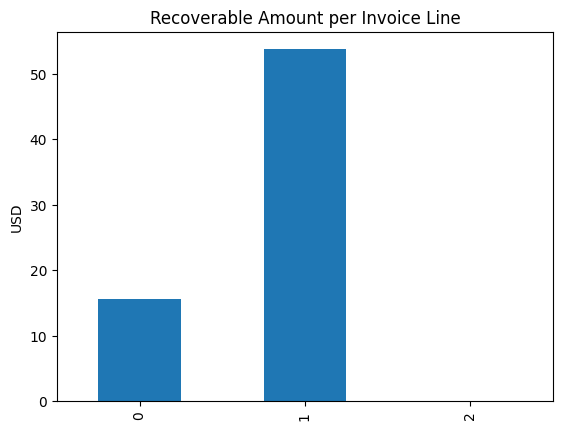


Summary: {'total_invoices': 3, 'pct_flagged': np.float64(66.67), 'total_recoverable_usd': np.float64(69.3)}


In [4]:
import sys, os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
from src.reconciliation import reconcile_invoices

invoices = pd.read_csv("../data/invoices_sample.csv")
rates = pd.read_csv("../data/rates_sample.csv")

results, summary = reconcile_invoices(invoices, rates)

# --- Dashboard summary table ---
dashboard = pd.DataFrame({
    "metric": [
        "Total invoice lines reviewed",
        "% of invoices flagged for exception",
        "Estimated recoverable $"
    ],
    "value": [
        summary["total_invoices"],
        f"{summary['pct_flagged']}%",
        f"${round(summary['total_recoverable_usd'], 2)}"
    ]
})

display(dashboard)

# --- Pie chart: flagged vs clean ---
flagged_count = (results["flags"] != "OK").sum()
clean_count = (results["flags"] == "OK").sum()

plt.figure()
plt.pie(
    [flagged_count, clean_count],
    labels=["Flagged", "Clean"],
    autopct="%1.1f%%",
)
plt.title("Invoice Line Status Breakdown")
plt.show()

# --- Bar chart: $ recoverable per invoice line ---
results['recoverable_amount_est'].plot(
    kind='bar',
    title='Recoverable Amount per Invoice Line',
    ylabel='USD'
)
plt.show()

print("\nSummary:", summary)
